In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics as stat
import plotly.express as px

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [30]:
ckd = pd.read_excel('/Users/anagha/Documents/UIC/SPRING 2023/HIMA/CHRONIC KIDNEY DISEASE/Chronic Kidney Disease Dataset.xls', sheet_name='All Data')

In [31]:
ckd.head()

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
0,1,65,1,white,0.0,0.0,1.0,other,1.0,56.0,...,0.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0
1,2,36,1,hispa,0.0,NaN,1.0,noplace,0.0,60.2,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,66,1,white,0.0,1.0,0.0,noplace,1.0,83.9,...,0.0,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,54,1,white,1.0,0.0,0.0,DrHMO,1.0,69.4,...,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,63,1,black,0.0,0.0,NaN,clinic,1.0,73.1,...,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
ckd.columns

Index(['ID', 'Age', 'Female', 'Racegrp', 'Educ', 'Unmarried', 'Income',
       'CareSource', 'Insured', 'Weight', 'Height', 'BMI', 'Obese', 'Waist',
       'SBP', 'DBP', 'HDL', 'LDL', 'Total Chol', 'Dyslipidemia', 'PVD',
       'Activity', 'PoorVision', 'Smoker', 'Hypertension', 'Fam Hypertension',
       'Diabetes', 'Fam Diabetes', 'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia',
       'CKD'],
      dtype='object')

In [33]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8819 entries, 0 to 8818
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8819 non-null   int64  
 1   Age               8819 non-null   int64  
 2   Female            8819 non-null   int64  
 3   Racegrp           8819 non-null   object 
 4   Educ              8799 non-null   float64
 5   Unmarried         8367 non-null   float64
 6   Income            7653 non-null   float64
 7   CareSource        8819 non-null   object 
 8   Insured           8706 non-null   float64
 9   Weight            8625 non-null   float64
 10  Height            8628 non-null   float64
 11  BMI               8529 non-null   float64
 12  Obese             8529 non-null   float64
 13  Waist             8505 non-null   float64
 14  SBP               8511 non-null   float64
 15  DBP               8439 non-null   float64
 16  HDL               8802 non-null   float64


In [34]:
ckd.describe()

,ID,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,...,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia,CKD
count,8819.000000,8819.000000,8819.000000,8799.000000,8367.000000,7653.000000,8706.000000,8625.000000,8628.000000,8529.000000,...,8739.000000,8819.000000,8817.000000,8819.000000,8808.000000,8796.000000,8400.000000,8783.00000,8813.000000,6000.000000
mean,4410.000000,49.358204,0.527271,0.431413,0.368591,0.417222,0.804503,79.094342,167.026854,28.294348,...,0.401419,0.233246,0.111376,0.311713,0.031449,0.066394,0.343214,0.02892,0.020424,0.077333
std,2545.970345,18.828726,0.499284,0.495302,0.482452,0.493132,0.396606,19.410707,10.099770,6.186076,...,0.490213,0.422922,0.314615,0.463220,0.174537,0.248983,0.474811,0.16759,0.141455,0.267142
min,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.600000,130.400000,12.040000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2205.500000,33.000000,0.000000,0.000000,0.000000,0.000000,1.000000,65.400000,159.675000,24.080000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,4410.000000,47.000000,1.000000,0.000000,0.000000,0.000000,1.000000,76.700000,166.600000,27.360000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,6614.500000,65.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.500000,174.200000,31.360000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000
max,8819.000000,85.000000,1.000000,1.000000,1.000000,1.000000,1.000000,193.300000,200.100000,66.440000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [35]:
# Select all rows where CKD is null and store in a new dataframe. This is test data

ckd_test = ckd[ckd['CKD'].isna()]

In [36]:
# Drop CKD column

ckd_test.drop('CKD', axis=1, inplace = True)

In [37]:
ckd_test

,ID,Age,Female,Racegrp,Educ,Unmarried,Income,CareSource,Insured,Weight,...,Smoker,Hypertension,Fam Hypertension,Diabetes,Fam Diabetes,Stroke,CVD,Fam CVD,CHF,Anemia
6000,6001,69,1,white,0.0,0.0,1.0,DrHMO,1.0,73.5,...,0,1.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0
6001,6002,40,0,white,0.0,1.0,0.0,DrHMO,0.0,68.3,...,0,0.0,1,0.0,1,0.0,0.0,1.0,0.0,0.0
6002,6003,76,0,white,1.0,0.0,1.0,DrHMO,1.0,NaN,...,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
6003,6004,70,1,black,0.0,1.0,0.0,clinic,1.0,68.4,...,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
6004,6005,24,1,hispa,0.0,0.0,0.0,DrHMO,1.0,65.5,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8814,8815,32,1,white,1.0,0.0,1.0,DrHMO,1.0,80.4,...,1,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
8815,8816,77,1,white,0.0,1.0,0.0,clinic,1.0,67.5,...,0,1.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0
8816,8817,56,1,white,0.0,0.0,NaN,DrHMO,1.0,49.0,...,0,0.0,0,0.0,1,0.0,0.0,0.0,0.0,0.0
8817,8818,25,1,black,0.0,1.0,NaN,clinic,0.0,84.2,...,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Drop all rows from training data with null values in any column

ckd.dropna(axis=0, inplace = True)

In [39]:
ckd.isnull().sum()

ID                  0
Age                 0
Female              0
Racegrp             0
Educ                0
Unmarried           0
Income              0
CareSource          0
Insured             0
Weight              0
Height              0
BMI                 0
Obese               0
Waist               0
SBP                 0
DBP                 0
HDL                 0
LDL                 0
Total Chol          0
Dyslipidemia        0
PVD                 0
Activity            0
PoorVision          0
Smoker              0
Hypertension        0
Fam Hypertension    0
Diabetes            0
Fam Diabetes        0
Stroke              0
CVD                 0
Fam CVD             0
CHF                 0
Anemia              0
CKD                 0
dtype: int64

In [40]:
# Drop ID from both sets

ckd.drop('ID', axis  = 1, inplace=True)

In [41]:
ckd_test.drop('ID', axis = 1, inplace=True)

In [42]:
ckd['CKD'] = ckd['CKD'].astype('category')
ckd['CKD'].cat.rename_categories(['0', '1'], inplace = True)

In [43]:
ckd['CKD']

0       0
2       0
3       0
5       0
6       0
       ..
5995    1
5996    0
5997    0
5998    0
5999    0
Name: CKD, Length: 4136, dtype: category
Categories (2, object): ['0', '1']

In [58]:
ckd['CareSource'].value_counts()

DrHMO      2457
clinic      863
noplace     622
other       193
              1
Name: CareSource, dtype: int64

In [62]:
ckd['CareSource'] = ckd['CareSource'].replace({
    ' ' : 'DrHMO'
})

In [63]:
ckd.loc[5933]

Age                    32
Female                  0
Racegrp             white
Educ                  0.0
Unmarried             0.0
Income                0.0
CareSource          DrHMO
Insured               1.0
Weight              133.1
Height              182.6
BMI                 39.92
Obese                 1.0
Waist               135.7
SBP                 181.0
DBP                 116.0
HDL                  37.0
LDL                 152.0
Total Chol          189.0
Dyslipidemia            0
PVD                     0
Activity              4.0
PoorVision            1.0
Smoker                  1
Hypertension          1.0
Fam Hypertension        1
Diabetes              0.0
Fam Diabetes            1
Stroke                0.0
CVD                   0.0
Fam CVD               1.0
CHF                   0.0
Anemia                0.0
CKD                     0
Name: 5933, dtype: object

In [64]:
# VIF to check for multicollinearity

def vif(df):
    
    from sklearn.linear_model import LinearRegression
    
    vif_dict, tolerance_dict = {},{}
    
    for col in df.columns:
        
        y = df[col]
        X = df.drop(columns = col)
        
        r_squared = LinearRegression().fit(X,y).score(X,y)
        
        if r_squared < 1:
            
            vif = 1/(1 - r_squared)
            
        else:
            
            vif = 100
            
        vif_dict[col] = vif
        
        tolerance = 1 - r_squared
        
        tolerance_dict[col] = tolerance
        
        df_output = pd.DataFrame(data = {
            
            'VIF' : vif_dict,
            
            'Tolerance' : tolerance_dict})
    return df_output

In [65]:
ckd_vif = ckd.copy(deep=True)
ckd_vif.drop('CKD', axis = 1, inplace = True)

In [66]:
ckd_vif = pd.get_dummies(ckd_vif)

In [67]:
ckd_vif.columns

Index(['Age', 'Female', 'Educ', 'Unmarried', 'Income', 'Insured', 'Weight',
       'Height', 'BMI', 'Obese', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL',
       'Total Chol', 'Dyslipidemia', 'PVD', 'Activity', 'PoorVision', 'Smoker',
       'Hypertension', 'Fam Hypertension', 'Diabetes', 'Fam Diabetes',
       'Stroke', 'CVD', 'Fam CVD', 'CHF', 'Anemia', 'Racegrp_black',
       'Racegrp_hispa', 'Racegrp_other', 'Racegrp_white', 'CareSource_DrHMO',
       'CareSource_clinic', 'CareSource_noplace', 'CareSource_other'],
      dtype='object')

In [68]:
ckd_vif.drop(['Racegrp_white', 'CareSource_DrHMO'], axis  = 1, inplace=True)

In [69]:
ckd_vif

,Age,Female,Educ,Unmarried,Income,Insured,Weight,Height,BMI,Obese,...,CVD,Fam CVD,CHF,Anemia,Racegrp_black,Racegrp_hispa,Racegrp_other,CareSource_clinic,CareSource_noplace,CareSource_other
0,65,1,0.0,0.0,1.0,1.0,56.0,162.1,21.31,0.0,...,1.0,0.0,0.0,0.0,0,0,0,0,0,1
2,66,1,0.0,1.0,0.0,1.0,83.9,162.5,31.77,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
3,54,1,1.0,0.0,0.0,1.0,69.4,160.5,26.94,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,26,0,1.0,0.0,0.0,1.0,119.3,193.2,31.96,1.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
6,66,0,1.0,0.0,0.0,0.0,85.1,172.1,28.73,0.0,...,0.0,1.0,0.0,0.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,0,0.0,0.0,0.0,1.0,109.3,185.8,31.66,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5996,49,0,0.0,0.0,1.0,1.0,86.6,168.9,30.36,1.0,...,0.0,1.0,0.0,0.0,0,0,0,0,0,0
5997,30,0,1.0,1.0,0.0,1.0,78.0,174.9,25.50,0.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
5998,75,0,0.0,1.0,0.0,1.0,78.8,176.5,25.30,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,0


In [70]:
vif_values = vif(ckd_vif)

In [71]:
vif_values = pd.DataFrame(vif_values)
vif_values

,VIF,Tolerance
Age,2.327451,0.429655
Female,2.428113,0.411843
Educ,1.248845,0.800740
Unmarried,1.170583,0.854276
Income,1.292249,0.773845
Insured,1.328183,0.752908
Weight,93.645991,0.010679
Height,24.796983,0.040327
BMI,73.273421,0.013648
Obese,2.589778,0.386133


In [72]:
contingency = pd.crosstab(ckd['Fam Diabetes'],ckd['Diabetes'])
    
(stats.chi2_contingency(contingency)[1])

4.109116821584825e-52

In [73]:
ckd['LDL'].corr(ckd['Total Chol'])

0.9305276882635359

In [74]:
corr_columns = ['Weight', 'Height', 'BMI', 'Waist', 'SBP', 'DBP', 'HDL', 'LDL', 'Total Chol']

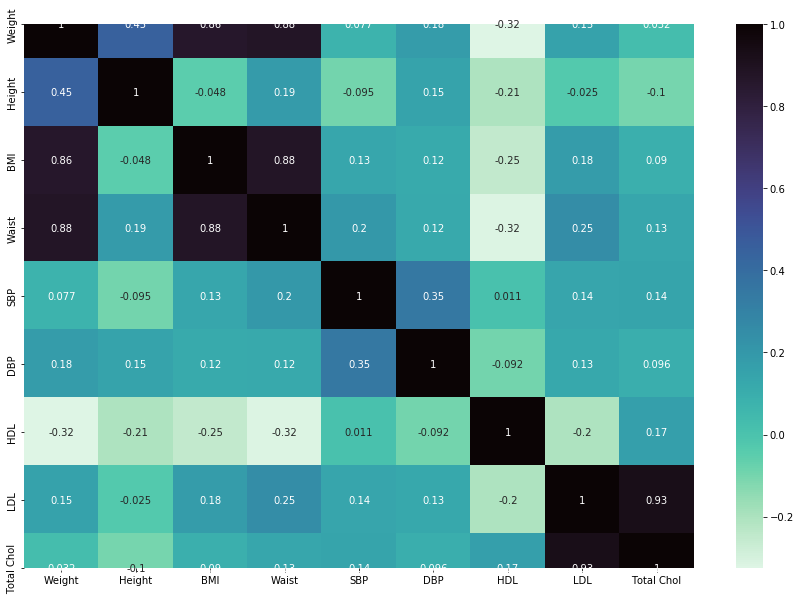

In [75]:
plt.figure(figsize=(15,10))
sns.heatmap(ckd[corr_columns].corr(), annot=True, cmap=sns.cm.mako_r)
plt.show()

In [76]:
# Dropping variables with high VIF Values

ckd_vif.drop(['BMI', 'Height', 'Waist', 'LDL'], inplace=True, axis = 1)

In [77]:
vif_values = vif(ckd_vif)

In [78]:
vif_values

,VIF,Tolerance
Age,2.143694,0.466484
Female,1.573760,0.635421
Educ,1.235278,0.809534
Unmarried,1.172852,0.852622
Income,1.280170,0.781146
Insured,1.326754,0.753719
Weight,2.551064,0.391993
Obese,2.187626,0.457116
SBP,2.153434,0.464374
DBP,1.292341,0.773790


In [ ]:
'BMI', 'Height', 'Waist', 'LDL'

In [79]:
ckd.drop(['BMI', 'Height', 'Waist', 'LDL', 'Fam Diabetes', 'Fam Hypertension'], axis = 1, inplace=True)

In [80]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           4136 non-null   int64   
 1   Female        4136 non-null   int64   
 2   Racegrp       4136 non-null   object  
 3   Educ          4136 non-null   float64 
 4   Unmarried     4136 non-null   float64 
 5   Income        4136 non-null   float64 
 6   CareSource    4136 non-null   object  
 7   Insured       4136 non-null   float64 
 8   Weight        4136 non-null   float64 
 9   Obese         4136 non-null   float64 
 10  SBP           4136 non-null   float64 
 11  DBP           4136 non-null   float64 
 12  HDL           4136 non-null   float64 
 13  Total Chol    4136 non-null   float64 
 14  Dyslipidemia  4136 non-null   int64   
 15  PVD           4136 non-null   int64   
 16  Activity      4136 non-null   float64 
 17  PoorVision    4136 non-null   float64 
 18  Smoker  

In [81]:
# t-tests for numerical vs categorical

ckd_0 = ckd[ckd['CKD'] == '0']
ckd_1 = ckd[ckd['CKD'] == '1']

t_test_variables = ['Age', 'Weight', 'SBP', 'DBP', 'Total Chol', 'HDL']

p_values_t_test = []

for variable in t_test_variables:
    
    p_values_t_test.append(stats.ttest_ind(ckd_0[variable], ckd_1[variable])[1])
    
    
t_test = pd.DataFrame(data={
    'Variable' : t_test_variables,
    'P-value'  : p_values_t_test
}) 

In [82]:
t_test

,Variable,P-value
0,Age,2.841272e-113
1,Weight,8.060397e-01
2,SBP,9.505868e-40
3,DBP,2.818226e-03
4,Total Chol,1.492170e-01
5,HDL,3.800099e-03


In [83]:
t_test[t_test['P-value'] > 0.05]

,Variable,P-value
1,Weight,0.806040
4,Total Chol,0.149217


In [84]:
cat_rename_list = ['Female','Educ', 'Unmarried', 'Income', 'Insured', 'Obese', 'Dyslipidemia', 'PVD', 'PoorVision', 'Smoker', 'Hypertension', 'Diabetes','Stroke', 'CVD', 'CHF', 'Anemia', 'Fam CVD']

In [85]:
for variable in cat_rename_list :
    
     ckd[variable] = ckd[variable].astype('category')

In [86]:
for variable in cat_rename_list :
    
     ckd[variable].cat.rename_categories(['0', '1'], inplace = True)
        
ckd['Activity']  = ckd['Activity'].astype('category')
ckd['Activity'].cat.rename_categories(['1','2','3','4'], inplace = True)

In [87]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           4136 non-null   int64   
 1   Female        4136 non-null   category
 2   Racegrp       4136 non-null   object  
 3   Educ          4136 non-null   category
 4   Unmarried     4136 non-null   category
 5   Income        4136 non-null   category
 6   CareSource    4136 non-null   object  
 7   Insured       4136 non-null   category
 8   Weight        4136 non-null   float64 
 9   Obese         4136 non-null   category
 10  SBP           4136 non-null   float64 
 11  DBP           4136 non-null   float64 
 12  HDL           4136 non-null   float64 
 13  Total Chol    4136 non-null   float64 
 14  Dyslipidemia  4136 non-null   category
 15  PVD           4136 non-null   category
 16  Activity      4136 non-null   category
 17  PoorVision    4136 non-null   category
 18  Smoker  

In [88]:
chi_test_variables = ckd.select_dtypes(include=['category', 'object']).columns

In [89]:
p_values_chi_test = []

for variable in chi_test_variables:
    
    contingency = pd.crosstab(ckd[variable],ckd['CKD'])
    
    p_values_chi_test.append(stats.chi2_contingency(contingency)[1])

In [90]:
chi_test = pd.DataFrame(data={
    'Variable' : chi_test_variables,
    'P-value'  : p_values_chi_test
}) 

In [91]:
chi_test

,Variable,P-value
0,Female,5.155155e-01
1,Racegrp,8.446885e-10
2,Educ,4.421879e-05
3,Unmarried,1.434536e-03
4,Income,3.562931e-08
5,CareSource,4.305201e-07
6,Insured,3.471815e-11
7,Obese,1.683670e-01
8,Dyslipidemia,1.000000e+00
9,PVD,3.039083e-23


In [92]:
chi_test[chi_test['P-value'] > 0.05]

,Variable,P-value
0,Female,0.515515
7,Obese,0.168367
8,Dyslipidemia,1.000000
19,Anemia,0.247150


In [93]:
ckd_vif.drop(['Female', 'Obese', 'Dyslipidemia', 'Fam Diabetes', 'Anemia', 'Total Chol'], axis = 1, inplace = True)

In [94]:
vif_values = vif(ckd_vif)

In [95]:
vif_values

,VIF,Tolerance
Age,2.085890,0.479412
Educ,1.228919,0.813723
Unmarried,1.159002,0.862811
Income,1.275750,0.783853
Insured,1.325674,0.754333
Weight,1.261656,0.792609
SBP,2.146016,0.465980
DBP,1.259006,0.794277
HDL,1.192098,0.838857
PVD,1.079202,0.926611


In [96]:
ckd.drop(['Female', 'Obese', 'Dyslipidemia', 'Anemia', 'Weight', 'Total Chol'], axis = 1, inplace=True)

In [97]:
ckd

,Age,Racegrp,Educ,Unmarried,Income,CareSource,Insured,SBP,DBP,HDL,...,Activity,PoorVision,Smoker,Hypertension,Diabetes,Stroke,CVD,Fam CVD,CHF,CKD
0,65,white,0,0,1,other,1,135.0,71.0,48.0,...,3,0,1,0,0,0,1,0,0,0
2,66,white,0,1,0,noplace,1,115.0,57.0,44.0,...,1,0,1,0,1,0,0,0,0,0
3,54,white,1,0,0,DrHMO,1,110.0,57.0,74.0,...,2,0,1,0,0,0,0,0,0,0
5,26,white,1,0,0,DrHMO,1,129.0,70.0,43.0,...,2,0,0,0,0,0,0,1,0,0
6,66,black,1,0,0,DrHMO,0,137.0,92.0,41.0,...,3,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,white,0,0,0,DrHMO,1,149.0,77.0,33.0,...,2,0,1,1,0,0,0,0,0,1
5996,49,white,0,0,1,DrHMO,1,130.0,75.0,38.0,...,2,0,0,1,0,0,0,1,0,0
5997,30,black,1,1,0,clinic,1,126.0,83.0,40.0,...,1,0,0,0,0,0,0,1,0,0
5998,75,black,0,1,0,DrHMO,1,129.0,50.0,58.0,...,1,0,1,1,1,0,0,0,0,0


In [98]:
ckd_test.drop(['Female', 'Obese', 'Dyslipidemia', 'Fam Diabetes', 'Anemia', 'Weight', 'Height', 'Waist', 'HDL', 'LDL', 'BMI', 'Total Chol'], axis = 1, inplace = True)

In [99]:
ckd_test.shape

(2819, 20)

In [100]:
ckd.shape

(4136, 21)

In [101]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4136 entries, 0 to 5999
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Age           4136 non-null   int64   
 1   Racegrp       4136 non-null   object  
 2   Educ          4136 non-null   category
 3   Unmarried     4136 non-null   category
 4   Income        4136 non-null   category
 5   CareSource    4136 non-null   object  
 6   Insured       4136 non-null   category
 7   SBP           4136 non-null   float64 
 8   DBP           4136 non-null   float64 
 9   HDL           4136 non-null   float64 
 10  PVD           4136 non-null   category
 11  Activity      4136 non-null   category
 12  PoorVision    4136 non-null   category
 13  Smoker        4136 non-null   category
 14  Hypertension  4136 non-null   category
 15  Diabetes      4136 non-null   category
 16  Stroke        4136 non-null   category
 17  CVD           4136 non-null   category
 18  Fam CVD 

In [102]:
ckd['Racegrp'].value_counts()

white    2201
hispa    1130
black     681
other     124
Name: Racegrp, dtype: int64

In [103]:
round(1/(2201/4136))

2

In [104]:
round(1/(1130/4136))

4

In [105]:
round(1/(681/4136))

6

In [106]:
round(1/(124/4136))

33

In [107]:
ckd_target = ckd['CKD']
ckd.drop('CKD', axis = 1, inplace=True)

In [108]:
ckd = pd.get_dummies(ckd, drop_first=True)
ckd['CKD'] = ckd_target

In [109]:
X = ckd.iloc[:, :-1]
y = ckd.iloc[:, -1]

In [110]:
y = y.astype('int64')

In [111]:
X

,Age,SBP,DBP,HDL,Racegrp_hispa,Racegrp_other,Racegrp_white,Educ_1,Unmarried_1,Income_1,...,Activity_3,Activity_4,PoorVision_1,Smoker_1,Hypertension_1,Diabetes_1,Stroke_1,CVD_1,Fam CVD_1,CHF_1
0,65,135.0,71.0,48.0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
2,66,115.0,57.0,44.0,0,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
3,54,110.0,57.0,74.0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,26,129.0,70.0,43.0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,66,137.0,92.0,41.0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,77,149.0,77.0,33.0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
5996,49,130.0,75.0,38.0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
5997,30,126.0,83.0,40.0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
5998,75,129.0,50.0,58.0,0,0,0,0,1,0,...,0,0,0,1,1,1,0,0,0,0


In [112]:
X_train, X_test,\
    y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42)

In [113]:
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [114]:
y_pred = logreg.predict(X_test)

In [115]:
y_pred = pd.DataFrame(y_pred)

In [116]:
from sklearn import metrics

In [117]:
metrics.recall_score(y_test, y_pred, pos_label=1) * 100

5.660377358490567

In [118]:
accuracy_score(y_test, y_pred)

0.9347826086956522

In [119]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

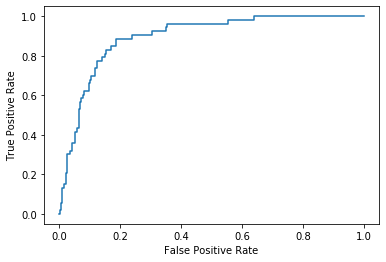

In [120]:
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'thresholds' : pd.Series(thresholds, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
57,0.169032,0.830189,0.830968,-0.000779,0.087244


In [122]:
optimal_idx = np.argmax(tpr - fpr)
threshold = thresholds[optimal_idx]

In [123]:
threshold

0.07521057392650446

In [124]:
pred_proba = pd.DataFrame(data = {
    'probs' : y_pred_proba
})

In [125]:
y_pred = pred_proba['probs'].map(lambda x: 1 if x > threshold else 0)

In [126]:
recall = metrics.recall_score(y_test, y_pred, pos_label=1) * 100

In [127]:
recall

86.79245283018868

In [128]:
(logreg.coef_[0])

array([ 0.07726799, -0.00728174, -0.01229353, -0.01957313, -1.20879462,
       -0.28622322, -0.10951658, -0.12147676,  0.28384415,  0.18419649,
       -0.02198544, -0.7417503 ,  0.47658867, -0.82988627,  0.36158552,
       -0.30732405, -0.59163846, -0.99929163,  0.12966388, -0.05093066,
        0.72063221,  0.30677369,  0.41051901,  0.55147592, -0.2881157 ,
       -0.10996462])

In [129]:
coeff_df = pd.DataFrame({
    'Variable' : X_train.columns,
    'Coefficients' : logreg.coef_[0]
})

In [130]:
coeff_df['Odds'] = np.exp(coeff_df['Coefficients'])

In [131]:
coeff_df

,Variable,Coefficients,Odds
0,Age,0.077268,1.080332
1,SBP,-0.007282,0.992745
2,DBP,-0.012294,0.987782
3,HDL,-0.019573,0.980617
4,Racegrp_hispa,-1.208795,0.298557
5,Racegrp_other,-0.286223,0.751095
6,Racegrp_white,-0.109517,0.896267
7,Educ_1,-0.121477,0.885612
8,Unmarried_1,0.283844,1.328226
9,Income_1,0.184196,1.202252


In [132]:
import statsmodels.api as sms
model = sms.Logit(y_train, X_train).fit()
summary = model.summary()

results_as_html = summary.tables[1].as_html()
coeff = pd.read_html(results_as_html, header=0, index_col=0)[0]


Optimization terminated successfully.
         Current function value: 0.173592
         Iterations 9


In [133]:
coeff.drop(['std err', 'z', '[0.025', '0.975]'], axis = 1, inplace= True)

In [134]:
coeff

,coef,P>|z|
Age,0.0601,0.000
SBP,-0.0159,0.000
DBP,-0.0312,0.000
HDL,-0.0277,0.000
Racegrp_hispa,-1.0693,0.000
Racegrp_other,-0.4799,0.456
Racegrp_white,0.0104,0.963
Educ_1,-0.2520,0.162
Unmarried_1,0.2203,0.209
Income_1,-0.1396,0.466


In [135]:
coeff['Odds'] = np.exp(coeff['coef'])

In [136]:
coeff

,coef,P>|z|,Odds
Age,0.0601,0.000,1.061943
SBP,-0.0159,0.000,0.984226
DBP,-0.0312,0.000,0.969282
HDL,-0.0277,0.000,0.972680
Racegrp_hispa,-1.0693,0.000,0.343249
Racegrp_other,-0.4799,0.456,0.618845
Racegrp_white,0.0104,0.963,1.010454
Educ_1,-0.2520,0.162,0.777245
Unmarried_1,0.2203,0.209,1.246451
Income_1,-0.1396,0.466,0.869706


In [338]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_proba)

In [339]:
# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head()

,Precision,Recall,Threshold
0,0.095841,1.000000,0.005332
1,0.094203,0.981132,0.005375
2,0.094374,0.981132,0.005376
3,0.094545,0.981132,0.005701
4,0.094718,0.981132,0.005737


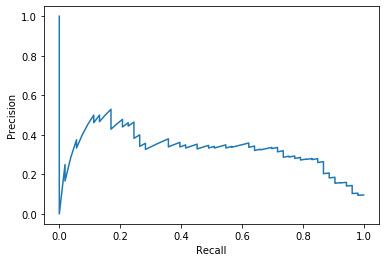

In [340]:
plt.plot(recall, precision)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [341]:
266/ckd['CKD'].value_counts().sum() * 100

6.431334622823985

In [342]:
cm = metrics.confusion_matrix(y_test, y_pred)

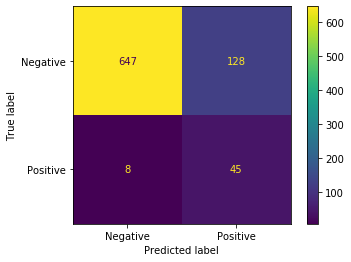

In [343]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Negative', 'Positive'])

cm_display.plot()

plt.show()